# Objective
- To perform exploratory data analysis on nepali license plate recognition dataset

In [5]:
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import os
import glob
import cv2
%matplotlib inline

Samples of each digit are placed in their respective directories. You'll need to extract *images.rar*.

In [2]:
images_dir = "./images"
# list of all digits
digits = list(map(str, range(10))) + ["ba", "pa"]
# map digits to their respective directory path
digits_dir = dict(zip(digits, map(lambda d: os.path.join(images_dir, d), digits)))

In [3]:
digits, digits_dir

(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'ba', 'pa'],
 {'0': './images\\0',
  '1': './images\\1',
  '2': './images\\2',
  '3': './images\\3',
  '4': './images\\4',
  '5': './images\\5',
  '6': './images\\6',
  '7': './images\\7',
  '8': './images\\8',
  '9': './images\\9',
  'ba': './images\\ba',
  'pa': './images\\pa'})

## Data analysis
There are serveral things we want to check. First we'll check how many samples are there for each digit. Next we'll visualize some of the samples from each digit and then we'll look at color distribution of images for each digit.

            count
count   12.000000
mean   169.416667
std     39.442613
min     96.000000
25%    144.000000
50%    173.500000
75%    197.000000
max    234.000000


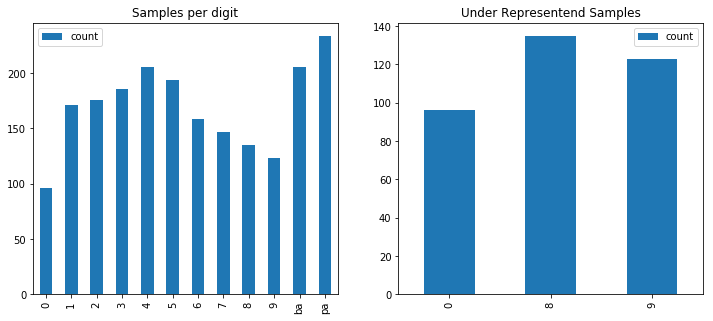

In [4]:
digits_col = []
total_files_col = [] 
for digit, folder in digits_dir.items():
    total_files = len(glob.glob(os.path.join(folder, "*.jpg")))
    digits_col.append(digit)
    total_files_col.append(total_files)
    
# prepare a pandas dataframe and sort by digit
sample_count_df = pd.DataFrame({'count': total_files_col}, index=digits_col).sort_index()
print(sample_count_df.describe())
lower_percentile = sample_count_df.describe()['count']['25%']

fix, axes = plt.subplots(1, 2, figsize=(12, 5))
sample_count_df.plot.bar(ax=axes[0], title="Samples per digit")
sample_count_df[sample_count_df['count'] < lower_percentile].plot.bar(ax=axes[1], title="Under Representend Samples")

It seems that digit **0** has the least i.e. 96 samples where as digit **pa** has the most (234). Digits **0, 8 and 9** are comparatively under-represented. If our model does not generalize well enough for these categories then we might have to do data augmentation or estimate class weights. We'll revisit this later when we develop our models.